# Scaling and correlation
## Goals

- Scaling of the data with MinMaxScaler
- Performing the correlation
- exporting the scaled table

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv('./data/230907_basic_table_for_analysis_cleaned.csv', low_memory=False, index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2509596 entries, 201900000001 to 201800057783
Data columns (total 43 columns):
 #   Column        Dtype  
---  ------        -----  
 0   num_veh       object 
 1   place         float64
 2   catu          int64  
 3   grav          int64  
 4   sexe          int64  
 5   an_nais       float64
 6   trajet        float64
 7   locp          float64
 8   actp          object 
 9   etatp         float64
 10  an            int64  
 11  mois          int64  
 12  jour          int64  
 13  hrmn          object 
 14  lum           int64  
 15  agg           int64  
 16  int           int64  
 17  atm           float64
 18  col           float64
 19  adr           object 
 20  lat           float64
 21  long          float64
 22  dep           int64  
 23  metropolitan  float64
 24  catr          float64
 25  circ          float64
 26  nbv           float64
 27  vosp          float64
 28  prof          float64
 29  plan          float64
 30  surf   

In [5]:
df.select_dtypes(include=[np.number]).columns

Index(['place', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'locp', 'etatp',
       'an', 'mois', 'jour', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long',
       'dep', 'metropolitan', 'catr', 'circ', 'nbv', 'vosp', 'prof', 'plan',
       'surf', 'infra', 'situ', 'senc', 'catv', 'occutc', 'obs', 'obsm',
       'choc', 'manv'],
      dtype='object')

In [6]:
df.head()

,num_veh,place,catu,grav,sexe,an_nais,trajet,locp,actp,etatp,...,senc,catv,occutc,obs,obsm,choc,manv,date,is_holiday,holiday
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,B01,2.0,2,4,2,2002.0,0.0,-1.0,-1,-1.0,...,2.0,7,-1.0,0.0,2.0,5.0,23.0,2019-11-30,False,NaN
201900000001,B01,1.0,1,4,2,1993.0,5.0,-1.0,-1,-1.0,...,2.0,7,-1.0,0.0,2.0,5.0,23.0,2019-11-30,False,NaN
201900000001,A01,1.0,1,1,1,1959.0,0.0,-1.0,-1,-1.0,...,2.0,17,-1.0,1.0,0.0,3.0,11.0,2019-11-30,False,NaN
201900000002,A01,1.0,1,4,2,1994.0,0.0,-1.0,-1,-1.0,...,1.0,7,-1.0,4.0,0.0,1.0,0.0,2019-11-30,False,NaN
201900000003,A01,1.0,1,1,1,1996.0,0.0,-1.0,0,-1.0,...,1.0,7,-1.0,0.0,2.0,1.0,2.0,2019-11-28,False,NaN


In [13]:
# Select the data for the correlation

columns = ['an', 'mois', 'lum', 'agg', 'int', 'atm', 'col', 
       'catr', 'circ', 'nbv', 'vosp', 'prof', 'plan', 'surf', 'infra',
       'situ', 'place', 'catu', 'grav', 'sexe',
        'trajet', 'locp', 'etatp', 'senc', 'catv', 'occutc', 
        'obs', 'obsm', 'choc', 'manv', 'is_holiday']
df_select = df[columns]
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2509596 entries, 201900000001 to 201800057783
Data columns (total 31 columns):
 #   Column      Dtype  
---  ------      -----  
 0   an          int64  
 1   mois        int64  
 2   lum         int64  
 3   agg         int64  
 4   int         int64  
 5   atm         float64
 6   col         float64
 7   catr        float64
 8   circ        float64
 9   nbv         float64
 10  vosp        float64
 11  prof        float64
 12  plan        float64
 13  surf        float64
 14  infra       float64
 15  situ        float64
 16  place       float64
 17  catu        int64  
 18  grav        int64  
 19  sexe        int64  
 20  trajet      float64
 21  locp        float64
 22  etatp       float64
 23  senc        float64
 24  catv        int64  
 25  occutc      float64
 26  obs         float64
 27  obsm        float64
 28  choc        float64
 29  manv        float64
 30  is_holiday  bool   
dtypes: bool(1), float64(21), int64(9)
memory usage

In [14]:
# Scale the data
scaler = MinMaxScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_select), columns=columns)
df_numeric_scaled.head()

,an,mois,lum,agg,int,atm,col,catr,circ,nbv,...,locp,etatp,senc,catv,occutc,obs,obsm,choc,manv,is_holiday
0,0.875,0.909091,0.833333,0.0,0.2,0.2,0.375,0.0,0.8,0.11,...,0.0,0.0,0.75,0.08,0.0,0.055556,0.3,0.6,0.888889,0.0
1,0.875,0.909091,0.833333,0.0,0.2,0.2,0.375,0.0,0.8,0.11,...,0.0,0.0,0.75,0.08,0.0,0.055556,0.3,0.6,0.888889,0.0
2,0.875,0.909091,0.833333,0.0,0.2,0.2,0.375,0.0,0.8,0.11,...,0.0,0.0,0.75,0.18,0.0,0.111111,0.1,0.4,0.444444,0.0
3,0.875,0.909091,0.666667,0.0,0.2,0.2,0.875,0.0,0.4,0.03,...,0.0,0.0,0.50,0.08,0.0,0.277778,0.1,0.2,0.037037,0.0
4,0.875,0.909091,0.333333,0.0,0.2,0.2,0.625,0.0,0.8,0.09,...,0.0,0.0,0.50,0.08,0.0,0.055556,0.3,0.2,0.111111,0.0


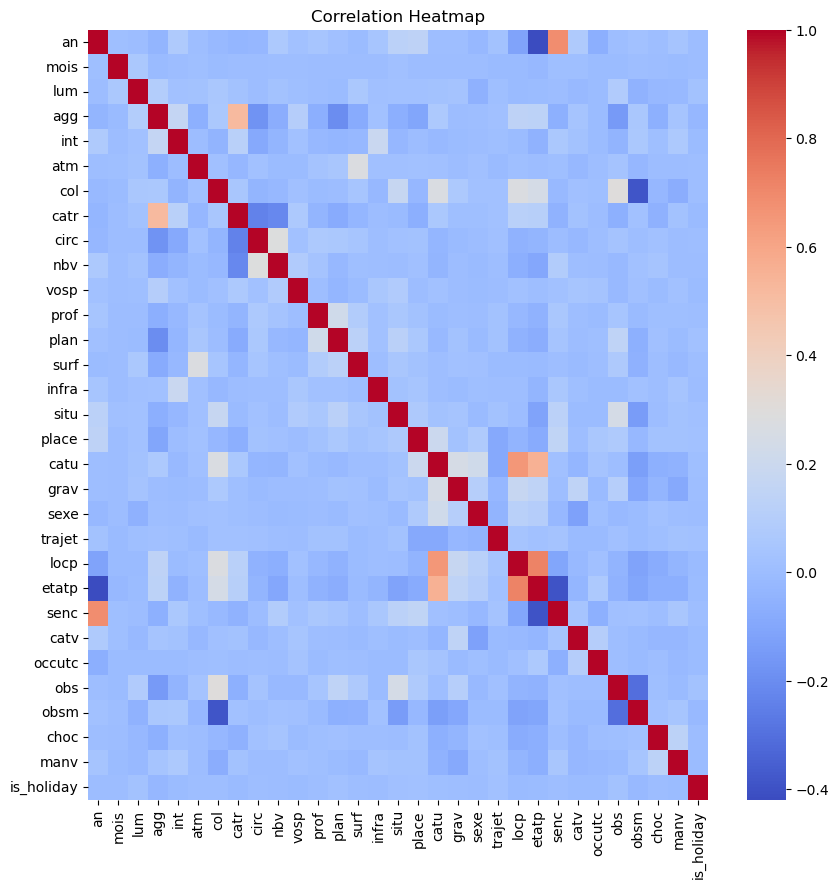

In [15]:
# Create a correlation matrix
correlation_matrix = df_numeric_scaled.corr()
plt.figure(figsize=(10, 10))
# Generate the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show();